<a href="https://colab.research.google.com/github/francis-backon/py/blob/master/unsupervised_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [31]:
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
!pip install kmodes
!pip install kprototypes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
!pip install plotly
!pip install tqdm
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing data

In [32]:
data=pd.read_csv("/content/Untitled2.csv")
data.head()

,Trait,State,FAA,IIV,Base,Avoidance,b1,e1,e2,SD,R1,b2,afrt,rvt,r2
0,30,4,-0.040,7.550,65,0,65,53,45,8.220,58.500,60.450,48.760,41.850,48.360
1,35,4,-0.080,5.010,53,0,53,47,43,4.110,47.700,49.290,38.070,39.990,39.430
2,30,-7,-0.060,6.890,68,0,68,57,50,7.410,61.200,63.240,54.720,46.500,50.590
3,35,3,-0.050,7.190,59,0,59,51,40,7.790,53.100,54.870,44.370,37.200,43.900
4,41,-2,-0.040,7.440,62,0,62,54,42,8.220,55.800,57.040,49.680,39.060,45.630


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trait      52 non-null     int64  
 1   State      52 non-null     int64  
 2   FAA        52 non-null     float64
 3   IIV        52 non-null     float64
 4   Base       52 non-null     int64  
 5   Avoidance  52 non-null     int64  
 6   b1         52 non-null     int64  
 7   e1         52 non-null     int64  
 8   e2         52 non-null     int64  
 9   SD         52 non-null     float64
 10  R1         52 non-null     float64
 11  b2         52 non-null     float64
 12  afrt       52 non-null     float64
 13  rvt        52 non-null     float64
 14  r2         52 non-null     float64
dtypes: float64(8), int64(7)
memory usage: 6.2 KB


# checking duplicate values

In [34]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
dtype: bool

# Checking Missing values

In [35]:
data.isnull().sum()

Trait        0
State        0
FAA          0
IIV          0
Base         0
Avoidance    0
b1           0
e1           0
e2           0
SD           0
R1           0
b2           0
afrt         0
rvt          0
r2           0
dtype: int64

In [36]:
data.describe()

,Trait,State,FAA,IIV,Base,Avoidance,b1,e1,e2,SD,R1,b2,afrt,rvt,r2
count,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000
mean,45.692,5.212,0.003,5.971,45.231,0.577,45.231,47.904,41.346,5.098,40.708,42.462,43.937,38.374,33.970
std,9.471,8.969,0.049,1.799,11.958,0.499,11.958,7.069,6.061,2.565,10.763,11.081,6.644,5.797,8.865
min,30.000,-21.000,-0.080,2.960,25.000,0.000,25.000,34.000,30.000,0.820,22.500,22.400,31.280,24.800,17.920
25%,39.000,-2.000,-0.050,4.312,37.000,0.000,37.000,41.750,37.750,2.940,33.300,36.240,37.983,35.108,28.990
50%,46.500,4.500,0.020,5.855,42.000,1.000,42.000,49.000,41.500,4.500,37.800,40.155,44.265,38.595,32.125
75%,51.000,11.250,0.050,7.315,56.000,1.000,56.000,54.250,45.000,7.373,50.400,52.080,49.910,41.850,41.660
max,70.000,28.000,0.070,10.910,68.000,1.000,68.000,60.000,61.000,9.930,61.200,63.240,55.200,56.730,50.590


In [37]:
data.head()

,Trait,State,FAA,IIV,Base,Avoidance,b1,e1,e2,SD,R1,b2,afrt,rvt,r2
0,30,4,-0.040,7.550,65,0,65,53,45,8.220,58.500,60.450,48.760,41.850,48.360
1,35,4,-0.080,5.010,53,0,53,47,43,4.110,47.700,49.290,38.070,39.990,39.430
2,30,-7,-0.060,6.890,68,0,68,57,50,7.410,61.200,63.240,54.720,46.500,50.590
3,35,3,-0.050,7.190,59,0,59,51,40,7.790,53.100,54.870,44.370,37.200,43.900
4,41,-2,-0.040,7.440,62,0,62,54,42,8.220,55.800,57.040,49.680,39.060,45.630


## Evaluating silhouette score

In [38]:
import sklearn.metrics as metrics

In [39]:
from sklearn.cluster import KMeans
for k in range(2,10):
    km=KMeans(n_clusters=k,init="k-means++",random_state=200)
    km.fit(data)
    labels=km.labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "
           +str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.4468900476505201
Silhouette score for k(clusters) = 3 is 0.3281807893900617
Silhouette score for k(clusters) = 4 is 0.2832089375981736
Silhouette score for k(clusters) = 5 is 0.24911101247747022
Silhouette score for k(clusters) = 6 is 0.24953541093952997
Silhouette score for k(clusters) = 7 is 0.2597063774683454
Silhouette score for k(clusters) = 8 is 0.27254324490658355
Silhouette score for k(clusters) = 9 is 0.27721342041850067


## Kmodes & Kprototype

In [40]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [41]:
data['Trait']=data['Trait'].astype('object')
data['State']=data['State'].astype('object')
data['Avoidance']=data['Avoidance'].astype('object')

In [42]:
data.select_dtypes('object').nunique()

Trait        18
State        25
Avoidance     2
dtype: int64

In [43]:
data_array=data.values

In [44]:
data_array

array([[30, 4, -0.04, 7.55, 65, 0, 65, 53, 45, 8.22, 58.5, 60.45, 48.76,
        41.85, 48.36],
       [35, 4, -0.08, 5.01, 53, 0, 53, 47, 43, 4.11, 47.7, 49.29, 38.07,
        39.99, 39.43],
       [30, -7, -0.06, 6.89, 68, 0, 68, 57, 50, 7.41, 61.2, 63.24, 54.72,
        46.5, 50.59],
       [35, 3, -0.05, 7.19, 59, 0, 59, 51, 40, 7.79, 53.1, 54.87, 44.37,
        37.2, 43.9],
       [41, -2, -0.04, 7.44, 62, 0, 62, 54, 42, 8.22, 55.8, 57.04, 49.68,
        39.06, 45.63],
       [30, 3, 0.02, 6.1, 57, 0, 57, 50, 41, 6.55, 51.3, 53.01, 48.5,
        38.13, 42.41],
       [33, 10, -0.03, 5.81, 56, 0, 56, 47, 41, 6.16, 50.4, 52.08, 43.24,
        38.13, 41.66],
       [46, 10, -0.04, 8.71, 66, 0, 66, 54, 42, 9.8, 59.4, 60.06, 49.68,
        39.06, 48.05],
       [46, 7, -0.06, 6.98, 52, 0, 52, 60, 43, 6.94, 46.8, 48.36, 55.2,
        39.99, 38.69],
       [43, -3, -0.06, 7.68, 48, 0, 48, 55, 61, 5.31, 43.2, 44.64, 50.6,
        56.73, 35.71],
       [47, 2, -0.04, 8.04, 42, 0, 42, 55, 5

In [45]:
import plotly.graph_objects as go
costs = []
n_clusters = []
cat_cols = [0,1,5]
for i in tqdm(range(2, 10)):
    try:
        kproto = KPrototypes(n_clusters=i, init='Huang', verbose=2)
        clusters = kproto.fit_predict(data, categorical=cat_cols)
        costs.append(kproto.cost_)
        n_clusters.append(i)
    except:
        print(f"Can't cluster with {i} clusters")
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs))
fig.show()

  0%|          | 0/8 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9, ncost: 15111.291720536885
Run: 1, iteration: 2/100, moves: 3, ncost: 14752.969638723935
Run: 1, iteration: 3/100, moves: 0, ncost: 14752.969638723935
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 5, ncost: 14752.969638723936
Run: 2, iteration: 2/100, moves: 0, ncost: 14752.969638723936
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 8, ncost: 14965.119493313328
Run: 3, iteration: 2/100, moves: 2, ncost: 14752.969638723936
Run: 3, iteration: 3/100, moves: 0, ncost: 14752.969638723936
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 2, ncost: 14752.969638723936
Run: 4, iteration: 2/100, moves: 0, ncost: 14752.969638723936
Init: initializing centroids
Init: initializing clusters
Sta

 12%|█▎        | 1/8 [00:00<00:02,  2.80it/s]


Run: 10, iteration: 2/100, moves: 0, ncost: 14752.969638723938
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3, ncost: 9868.150053346038
Run: 1, iteration: 2/100, moves: 0, ncost: 9868.150053346038
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 19, ncost: 13566.063033497518
Run: 2, iteration: 2/100, moves: 8, ncost: 11174.264130916668
Run: 2, iteration: 3/100, moves: 9, ncost: 9874.712430684744
Run: 2, iteration: 4/100, moves: 1, ncost: 9842.972630815992
Run: 2, iteration: 5/100, moves: 0, ncost: 9842.972630815992
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 6, ncost: 12034.325669087673
Run: 3, iteration: 2/100, moves: 0, ncost: 12034.325669087673
Init: 

 25%|██▌       | 2/8 [00:00<00:02,  2.39it/s]


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 11, ncost: 10177.573012010918
Run: 10, iteration: 2/100, moves: 3, ncost: 10001.898017963285
Run: 10, iteration: 3/100, moves: 2, ncost: 9842.972630815993
Run: 10, iteration: 4/100, moves: 0, ncost: 9842.972630815993
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12, ncost: 8051.659688178391
Run: 1, iteration: 2/100, moves: 2, ncost: 7865.01963726461
Run: 1, iteration: 3/100, moves: 2, ncost: 7760.4424912842505
Run: 1, iteration: 4/100, moves: 0, ncost: 7760.4424912842505
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 14, ncost: 8853.393864407159
Run: 2,

 38%|███▊      | 3/8 [00:01<00:02,  2.04it/s]

Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 7, ncost: 7834.61005771417
Run: 9, iteration: 2/100, moves: 2, ncost: 7712.506984052628
Run: 9, iteration: 3/100, moves: 1, ncost: 7685.409820514739
Run: 9, iteration: 4/100, moves: 0, ncost: 7685.409820514739
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 21, ncost: 7941.564413051766
Run: 10, iteration: 2/100, moves: 2, ncost: 7756.743098740445
Run: 10, iteration: 3/100, moves: 1, ncost: 7669.107429324264
Run: 10, iteration: 4/100, moves: 0, ncost: 7669.107429324264
Best run was number 10
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

 50%|█████     | 4/8 [00:02<00:02,  1.34it/s]

Run: 9, iteration: 5/100, moves: 0, ncost: 6365.354007463938
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 14, ncost: 8827.432011089864
Run: 10, iteration: 2/100, moves: 8, ncost: 7748.340787180424
Run: 10, iteration: 3/100, moves: 6, ncost: 7212.1412963853645
Run: 10, iteration: 4/100, moves: 2, ncost: 6722.947373287836
Run: 10, iteration: 5/100, moves: 5, ncost: 6143.234447256668
Run: 10, iteration: 6/100, moves: 1, ncost: 6108.935229046488
Run: 10, iteration: 7/100, moves: 0, ncost: 6108.935229046488
Best run was number 10
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
I

 62%|██████▎   | 5/8 [00:04<00:03,  1.33s/it]

Run: 10, iteration: 1/100, moves: 15, ncost: 6287.971895222891
Run: 10, iteration: 2/100, moves: 4, ncost: 5950.774217476964
Run: 10, iteration: 3/100, moves: 0, ncost: 5950.774217476964
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5, ncost: 4951.594315196542
Run: 1, iteration: 2/100, moves: 0, ncost: 4951.594315196542
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing 

 75%|███████▌  | 6/8 [00:05<00:02,  1.12s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Can't cluster with 7 clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
I

 88%|████████▊ | 7/8 [00:06<00:00,  1.04it/s]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Can't cluster with 8 clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
I

100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Can't cluster with 9 clusters


In [46]:
kproto=KPrototypes(n_clusters=3,verbose=2)
clusters=kproto.fit_predict(data_array,categorical=[0,1,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 15, ncost: 9920.092122086942
Run: 1, iteration: 2/100, moves: 1, ncost: 9842.972630815995
Run: 1, iteration: 3/100, moves: 0, ncost: 9842.972630815995
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 18, ncost: 10689.942072175661
Run: 2, iteration: 2/100, moves: 3, ncost: 10151.985765312173
Run: 2, iteration: 3/100, moves: 1, ncost: 10123.518842322597
Run: 2, iteration: 4/100, moves: 4, ncost: 9842.972630815992
Run: 2, iteration: 5/100, moves: 0, ncost: 9842.972630815992
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 9, ncost: 9901.5810797609
Run: 3, iteration:

In [47]:
print(kproto.cluster_centroids_)

[[ 1.11111111e-02  5.82277778e+00  4.25555556e+01  4.25555556e+01
   5.01666667e+01  4.46666667e+01  4.40111111e+00  3.83000000e+01
   4.03072222e+01  4.59266667e+01  4.15400000e+01  3.22472222e+01
   4.30000000e+01  4.00000000e+00  1.00000000e+00]
 [ 2.62500000e-02  4.94437500e+00  3.24375000e+01  3.24375000e+01
   4.02500000e+01  3.65625000e+01  3.25500000e+00  2.91937500e+01
   3.06100000e+01  3.70300000e+01  3.37512500e+01  2.44868750e+01
   5.10000000e+01 -4.00000000e+00  1.00000000e+00]
 [-2.66666667e-02  7.03222222e+00  5.92777778e+01  5.92777778e+01
   5.24444444e+01  4.22777778e+01  7.43444444e+00  5.33500000e+01
   5.51527778e+01  4.80855556e+01  3.93183333e+01  4.41222222e+01
   3.00000000e+01  1.00000000e+01  0.00000000e+00]]


In [48]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [49]:
data['cluster']=cluster_dict
data

,Trait,State,FAA,IIV,Base,Avoidance,b1,e1,e2,SD,R1,b2,afrt,rvt,r2,cluster
0,30,4,-0.040,7.550,65,0,65,53,45,8.220,58.500,60.450,48.760,41.850,48.360,2
1,35,4,-0.080,5.010,53,0,53,47,43,4.110,47.700,49.290,38.070,39.990,39.430,2
2,30,-7,-0.060,6.890,68,0,68,57,50,7.410,61.200,63.240,54.720,46.500,50.590,2
3,35,3,-0.050,7.190,59,0,59,51,40,7.790,53.100,54.870,44.370,37.200,43.900,2
4,41,-2,-0.040,7.440,62,0,62,54,42,8.220,55.800,57.040,49.680,39.060,45.630,2
5,30,3,0.020,6.100,57,0,57,50,41,6.550,51.300,53.010,48.500,38.130,42.410,2
6,33,10,-0.030,5.810,56,0,56,47,41,6.160,50.400,52.080,43.240,38.130,41.660,2
7,46,10,-0.040,8.710,66,0,66,54,42,9.800,59.400,60.060,49.680,39.060,48.050,2
8,46,7,-0.060,6.980,52,0,52,60,43,6.940,46.800,48.360,55.200,39.990,38.690,2
9,43,-3,-0.060,7.680,48,0,48,55,61,5.310,43.200,44.640,50.600,56.730,35.710,0


In [50]:
data[data['cluster']==0].head(10)
#data[data['cluster']==1].head(10)               #cluster membership
#data[data['cluster']==2].head(10)

,Trait,State,FAA,IIV,Base,Avoidance,b1,e1,e2,SD,R1,b2,afrt,rvt,r2,cluster
9,43,-3,-0.060,7.680,48,0,48,55,61,5.310,43.200,44.640,50.600,56.730,35.710,0
10,47,2,-0.040,8.040,42,0,42,55,52,5.560,37.800,37.800,50.600,48.360,30.240,0
14,46,18,-0.060,7.230,43,0,43,55,38,7.130,38.700,39.990,50.600,35.340,31.990,0
15,43,10,-0.050,7.090,49,0,49,57,39,7.360,44.100,45.570,52.440,36.270,36.460,0
16,48,20,-0.040,8.200,41,0,41,56,37,8.180,36.900,37.720,51.520,34.410,30.180,0
21,51,28,-0.050,5.950,49,0,49,57,45,4.990,44.100,45.570,52.440,41.850,36.460,0
27,50,-6,0.040,4.270,47,1,47,40,37,4.190,42.300,45.120,36.800,34.410,36.100,0
33,59,4,0.050,2.960,43,1,43,42,40,1.250,38.700,41.280,38.640,37.200,33.020,0
36,55,12,0.060,5.420,40,1,40,49,45,3.680,36.000,38.400,45.080,41.850,30.720,0
39,41,6,0.020,8.560,38,1,38,51,54,6.940,34.200,36.480,46.920,50.220,29.180,0


In [51]:
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
for k in range(2,10):
    km=KMeans(n_clusters=k,init="k-means++",random_state=200)
    km.fit(data_array)
    labels=km.labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "
           +str(metrics.silhouette_score(data_array,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.4468900476505201
Silhouette score for k(clusters) = 3 is 0.3281807893900617
Silhouette score for k(clusters) = 4 is 0.2832089375981736
Silhouette score for k(clusters) = 5 is 0.24911101247747022
Silhouette score for k(clusters) = 6 is 0.24953541093952997
Silhouette score for k(clusters) = 7 is 0.2597063774683454
Silhouette score for k(clusters) = 8 is 0.27254324490658355
Silhouette score for k(clusters) = 9 is 0.27721342041850067


#:DBSCAN

In [52]:
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
data_for_dbscan=pd.read_csv("/content/Untitled2.csv")

In [53]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(data_for_dbscan)    #at eps=12.5 and min_samples=4 . silhouette_score is high
DBSCAN_dataset = data_for_dbscan.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_           
DBSCAN_dataset
print(DBSCAN_dataset)
print(set(clustering.labels_))
n_clusters_=len(set(clustering.labels_))
n_noise_=list(clustering.labels_).count(-1)
print("Estimated number of clusters:%d" % n_clusters_)
print("Estimated number of noise points:%d" % n_noise_)



    Trait  State    FAA    IIV  Base  Avoidance  b1  e1  e2    SD     R1  \
0      30      4 -0.040  7.550    65          0  65  53  45 8.220 58.500   
1      35      4 -0.080  5.010    53          0  53  47  43 4.110 47.700   
2      30     -7 -0.060  6.890    68          0  68  57  50 7.410 61.200   
3      35      3 -0.050  7.190    59          0  59  51  40 7.790 53.100   
4      41     -2 -0.040  7.440    62          0  62  54  42 8.220 55.800   
5      30      3  0.020  6.100    57          0  57  50  41 6.550 51.300   
6      33     10 -0.030  5.810    56          0  56  47  41 6.160 50.400   
7      46     10 -0.040  8.710    66          0  66  54  42 9.800 59.400   
8      46      7 -0.060  6.980    52          0  52  60  43 6.940 46.800   
9      43     -3 -0.060  7.680    48          0  48  55  61 5.310 43.200   
10     47      2 -0.040  8.040    42          0  42  55  52 5.560 37.800   
11     39      9 -0.050  8.380    56          0  56  45  33 9.390 50.400   
12     30   

In [54]:
score = silhouette_score(DBSCAN_dataset, labels)

print(f"The Silhouette Score is: {score}")

The Silhouette Score is: 0.27800216739741257


In [55]:
DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1].head(10)
#DBSCAN_dataset[DBSCAN_dataset['Cluster']==0].head(10)   #cluster membership
#DBSCAN_dataset[DBSCAN_dataset['Cluster']==1].head(10)
#DBSCAN_dataset[DBSCAN_dataset['Cluster']==2].head(10)

,Trait,State,FAA,IIV,Base,Avoidance,b1,e1,e2,SD,R1,b2,afrt,rvt,r2,Cluster
0,30,4,-0.040,7.550,65,0,65,53,45,8.220,58.500,60.450,48.760,41.850,48.360,-1
2,30,-7,-0.060,6.890,68,0,68,57,50,7.410,61.200,63.240,54.720,46.500,50.590,-1
7,46,10,-0.040,8.710,66,0,66,54,42,9.800,59.400,60.060,49.680,39.060,48.050,-1
8,46,7,-0.060,6.980,52,0,52,60,43,6.940,46.800,48.360,55.200,39.990,38.690,-1
9,43,-3,-0.060,7.680,48,0,48,55,61,5.310,43.200,44.640,50.600,56.730,35.710,-1
10,47,2,-0.040,8.040,42,0,42,55,52,5.560,37.800,37.800,50.600,48.360,30.240,-1
11,39,9,-0.050,8.380,56,0,56,45,33,9.390,50.400,52.080,41.400,30.690,41.660,-1
13,33,10,-0.040,8.680,54,0,54,56,34,9.930,48.600,50.220,51.520,31.620,40.180,-1
14,46,18,-0.060,7.230,43,0,43,55,38,7.130,38.700,39.990,50.600,35.340,31.990,-1
15,43,10,-0.050,7.090,49,0,49,57,39,7.360,44.100,45.570,52.440,36.270,36.460,-1


In [56]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
-1,32
0,7
1,7
2,6


#:Hiearchical 

In [60]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
data_for_hie=pd.read_csv("/content/Untitled2.csv")

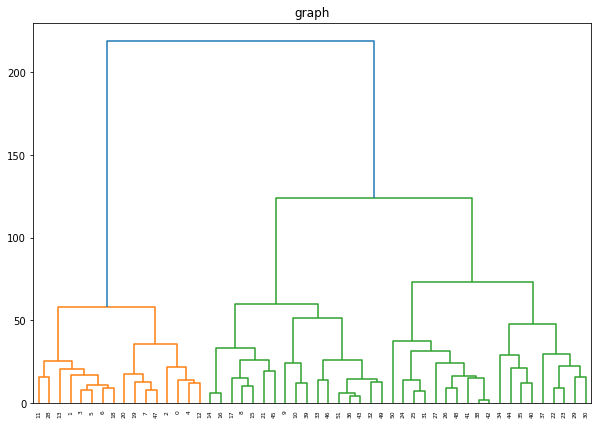

In [62]:
plt.figure(figsize=(10, 7))  
plt.title("graph")  
dend = shc.dendrogram(shc.linkage(data_for_hie, method='ward'))

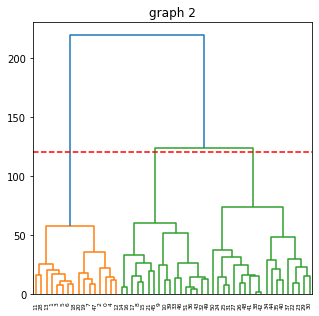

In [63]:
plt.figure(figsize=(5,5))  
plt.title("graph 2")  
dend = shc.dendrogram(shc.linkage(data_for_hie, method='ward'))
plt.axhline(y=120, color='r', linestyle='--')

In [82]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_for_hie)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 2])

In [83]:
data_for_hie['cluster']=cluster.fit_predict(data_for_hie)

In [84]:
data_for_hie

,Trait,State,FAA,IIV,Base,Avoidance,b1,e1,e2,SD,R1,b2,afrt,rvt,r2,cluster
0,30,4,-0.040,7.550,65,0,65,53,45,8.220,58.500,60.450,48.760,41.850,48.360,1
1,35,4,-0.080,5.010,53,0,53,47,43,4.110,47.700,49.290,38.070,39.990,39.430,1
2,30,-7,-0.060,6.890,68,0,68,57,50,7.410,61.200,63.240,54.720,46.500,50.590,1
3,35,3,-0.050,7.190,59,0,59,51,40,7.790,53.100,54.870,44.370,37.200,43.900,1
4,41,-2,-0.040,7.440,62,0,62,54,42,8.220,55.800,57.040,49.680,39.060,45.630,1
5,30,3,0.020,6.100,57,0,57,50,41,6.550,51.300,53.010,48.500,38.130,42.410,1
6,33,10,-0.030,5.810,56,0,56,47,41,6.160,50.400,52.080,43.240,38.130,41.660,1
7,46,10,-0.040,8.710,66,0,66,54,42,9.800,59.400,60.060,49.680,39.060,48.050,1
8,46,7,-0.060,6.980,52,0,52,60,43,6.940,46.800,48.360,55.200,39.990,38.690,2
9,43,-3,-0.060,7.680,48,0,48,55,61,5.310,43.200,44.640,50.600,56.730,35.710,2


In [85]:
score = silhouette_score(data_for_hie, labels)

print(f"The Silhouette Score is: {score}")

The Silhouette Score is: 0.2779685855424351
